# Video games EDA

> Exploring the [Video game sales dataset](https://www.kaggle.com/datasets/gregorut/videogamesales)

## Fields include

- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.


## Step 1: Project setup + Loading Dataset


In [166]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [167]:
# Helpers used

def humanize(s: str) -> str:
    """Return string humanize: without underscore and capitalized"""
    first, *parts = [x.strip() for x in s.replace("_", " ").split(" ")]
    capitalized = str.upper(first[0]) + first[1:]
    return str.join(" ", [capitalized, *parts])

In [168]:
import sys

ds_name = "vgsales.csv"
local_path = f"./assets/{ds_name}"
remote_path = f"https://cdn.jsdelivr.net/gh/emasuriano/python-demos/assets/{ds_name}"

IN_COLAB = "google.colab" in sys.modules
path_to_csv = remote_path if IN_COLAB else local_path

# Load dataset using pandas
sales = pd.read_csv(path_to_csv)

## Step 2: Data Inspection


In [169]:
# Display dataset
display(sales)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [170]:
# Shape of DS (amount of items and features)
sales.shape

(16598, 11)

In [171]:
# information about the dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [172]:
# get summary statistics for numerical features
sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [173]:
# Check for duplication
sales.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

## Step 3: Data Cleaning


In [174]:
# Get amount of missing values by column
sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [175]:
# Check for duplicated record
sales[sales.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [176]:
# Convert year to Datetime
sales["Year"] = pd.to_datetime(sales["Year"], format="%Y")

In [177]:
# Get rid of NA values to avoid data pollution
sales["Publisher"].fillna("Unknown", inplace=True)
sales.dropna(axis=0, how="any", inplace=True)
sales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [178]:
# Add Manufacturer company to the Dataset
platform_manufacturer = {
    "PCFX": "NEC",
    "GG": "Sega",
    "3DO": "Unknown",
    "TG16": "NEC",
    "WS": "Bandai",
    "NG": "SNK",
    "SCD": "Sega",
    "DC": "Sega",
    "GEN": "Sega",
    "SAT": "Sega",
    "PSV": "Sony",
    "WiiU": "Nintendo",
    "2600": "Atari",
    "XOne": "Microsoft",
    "GC": "Nintendo",
    "SNES": "Nintendo",
    "N64": "Nintendo",
    "3DS": "Nintendo",
    "NES": "Nintendo",
    "XB": "Microsoft",
    "GB": "Nintendo",
    "PC": "PC",
    "PS4": "Sony",
    "PSP": "Sony",
    "GBA": "Nintendo",
    "PS": "Sony",
    "DS": "Nintendo",
    "Wii": "Nintendo",
    "PS3": "Sony",
    "X360": "Microsoft",
    "PS2": "Sony",
}

sales["Manufacturer"] = sales["Platform"].map(platform_manufacturer)
sales["Manufacturer"].value_counts()

Manufacturer
Sony         6565
Nintendo     6169
Microsoft    2251
PC            943
Sega          259
Atari         116
SNK            12
Bandai          6
NEC             3
Unknown         3
Name: count, dtype: int64

In [179]:
# cleanup Platforms with less than 1M of sales
MIN_SALES_AMOUNT = 1

platform_sales = (
    sales.groupby("Platform")["Global_Sales"].sum().sort_values().reset_index()
)
min_sales_mask = platform_sales["Global_Sales"] < MIN_SALES_AMOUNT

platform_games_min_sales_mask = sales["Platform"].isin(
    platform_sales[min_sales_mask]["Platform"]
)
sales = sales[~platform_games_min_sales_mask]

display(sales[platform_games_min_sales_mask])

/var/folders/mw/8zsr5x410_d4hjk34txfhft40000gq/T/ipykernel_23877/1143409543.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(sales[platform_games_min_sales_mask])


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Manufacturer


## Step 4: Explore Data Characteristics


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


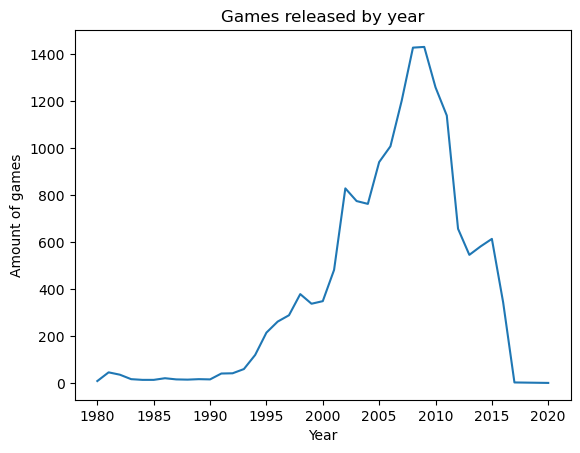

In [180]:
# Games shipped by year
games_year = sales.value_counts("Year").reset_index()
sns.lineplot(data=games_year, x="Year", y="count")

plt.title("Games released by year")
plt.ylabel("Amount of games")

plt.show()

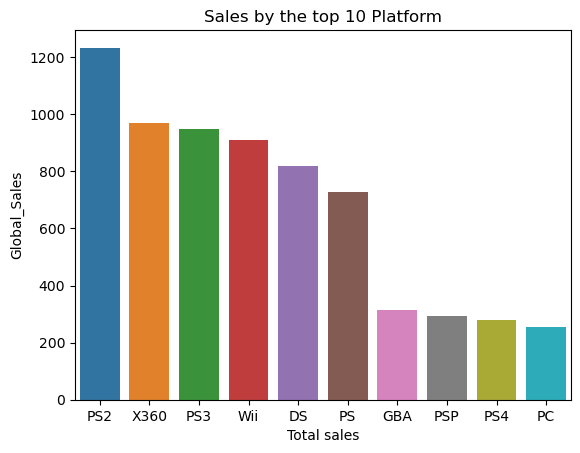

In [181]:
platform_by_sales = sales.groupby("Platform").agg({"Global_Sales": "sum"}).reset_index()
top_10_platforms = platform_by_sales.sort_values(by="Global_Sales", ascending=False)[
    0:10
]

sns.barplot(data=top_10_platforms, x="Platform", y="Global_Sales")

plt.title("Sales by the top 10 Platform")
plt.xlabel("Total sales")

plt.show()

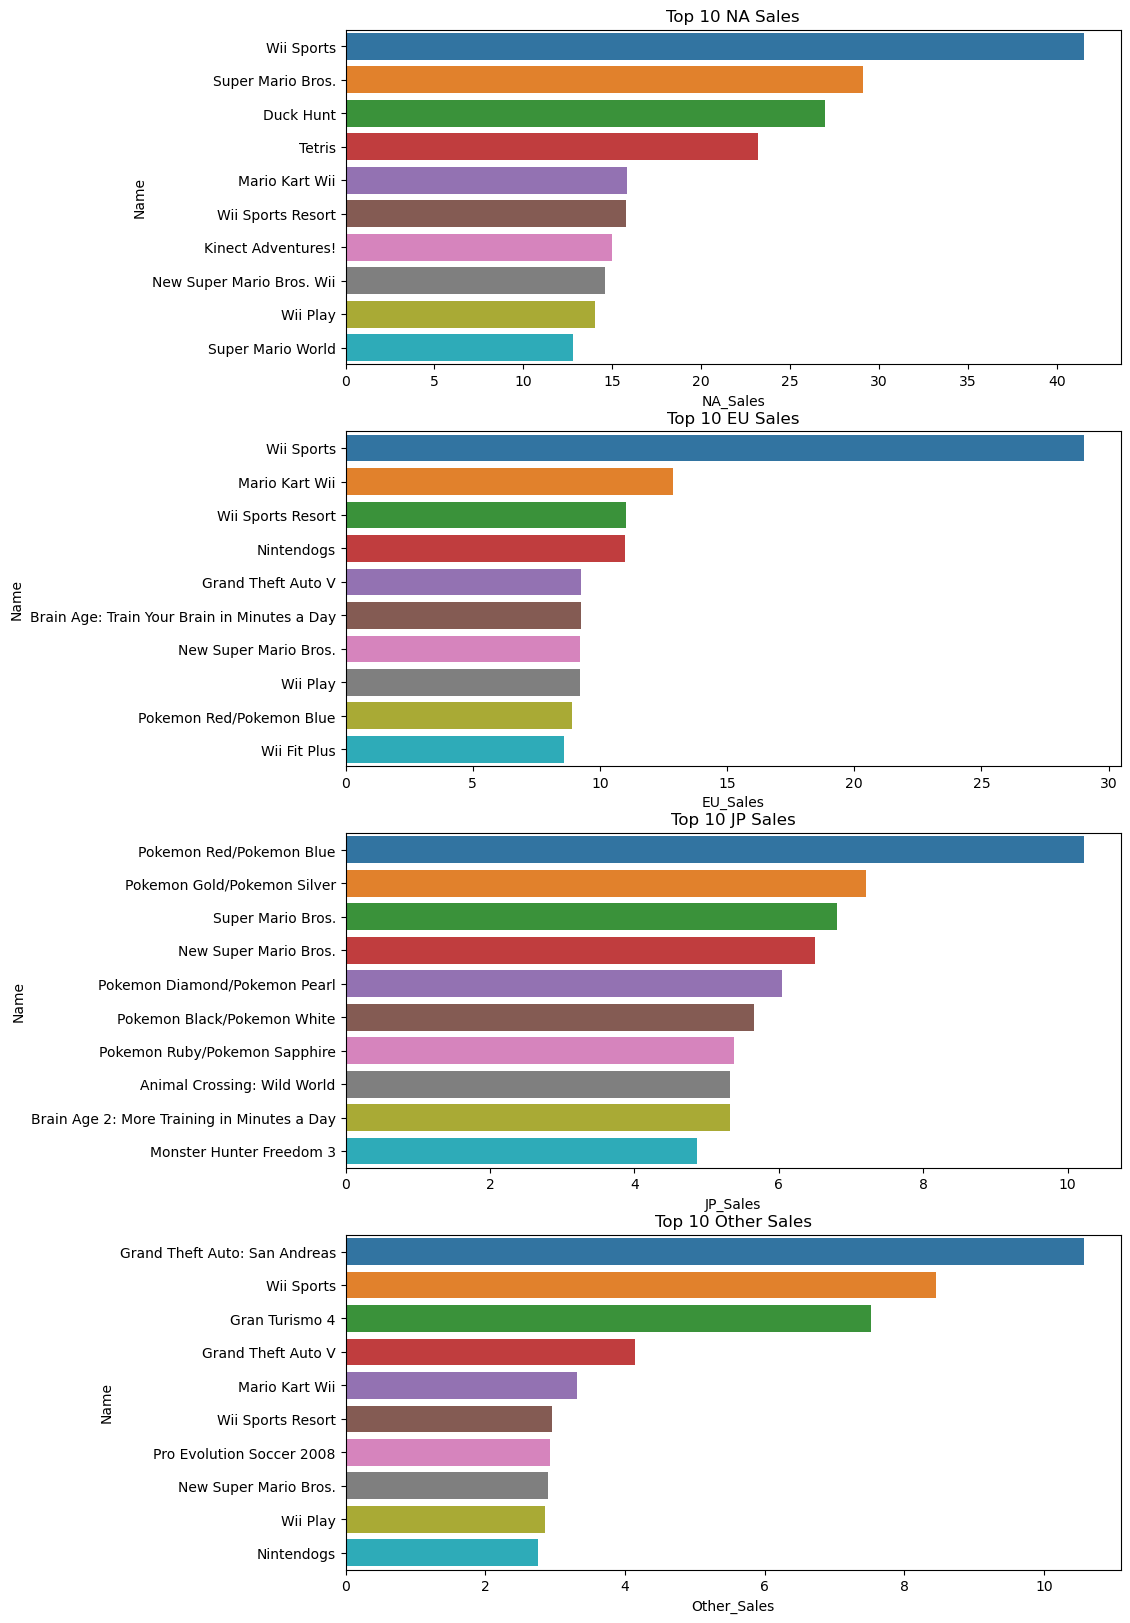

In [182]:
# Best selling games by market

markets = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

fig, axes = plt.subplots(len(markets), 1, figsize=(10, 20))

for i, market in enumerate(markets):
  sales_sorted = sales.sort_values(by=market, ascending=False)[0:10]
  sns.barplot(data=sales_sorted[0:10], y="Name", x=market, ax=axes[i])
  axes[i].set_title(f"Top 10 {humanize(market)}")

plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

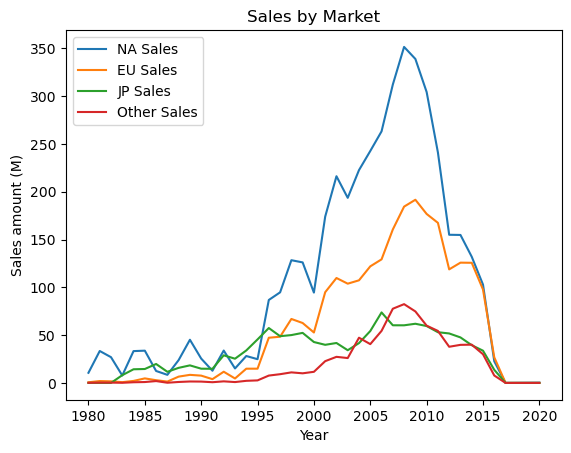

In [183]:
# Sales by Market in the years

agg_obj = {market: "sum" for market in markets}

yearly_sales = sales.groupby("Year").agg(agg_obj).reset_index()

for market in markets: 
    sns.lineplot(yearly_sales, x="Year", y=market, label=humanize(market))

plt.title('Sales by Market')
plt.ylabel("Sales amount (M)")
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

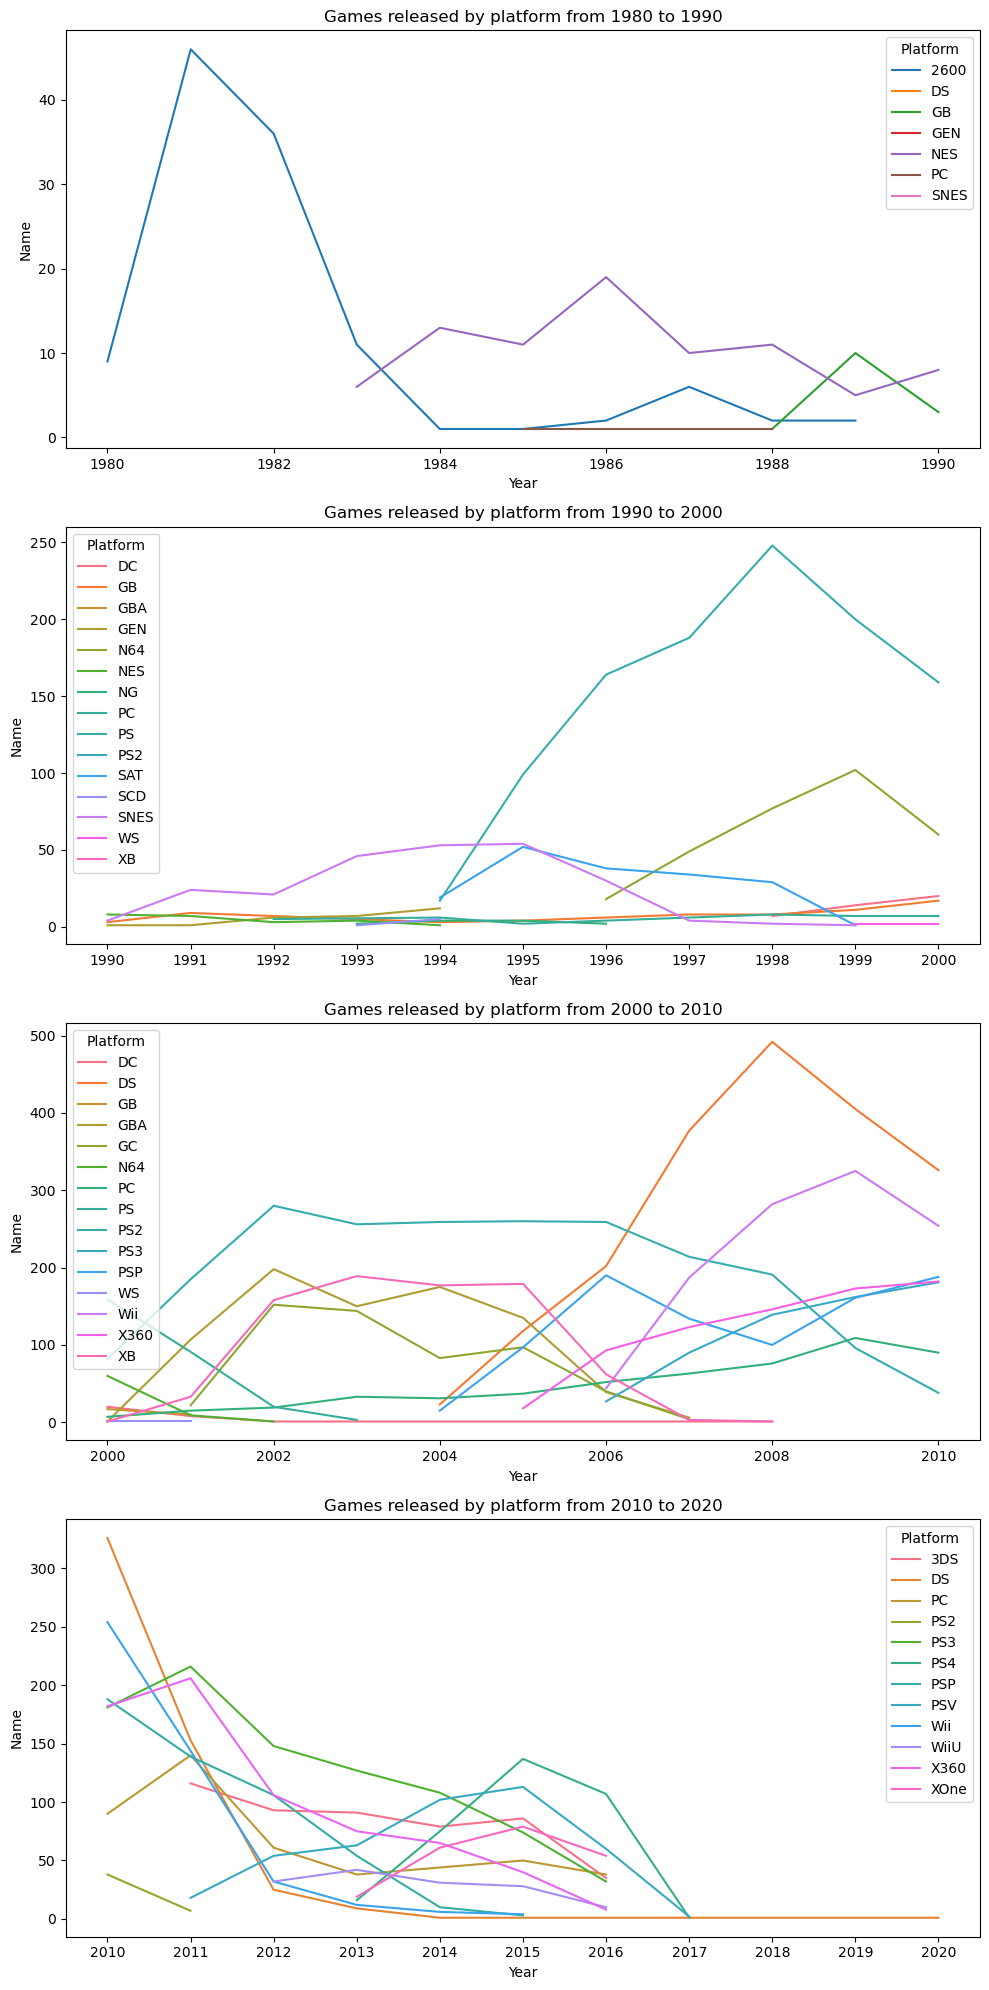

In [184]:
from datetime import datetime

# Games shipped by year
platform_year_games = sales.groupby(["Platform", "Year"])["Name"].count().reset_index()

range_year = 10
min_year = platform_year_games["Year"].min().year
max_year = platform_year_games["Year"].max().year
year_tuples = [(i, i + range_year) for i in range(min_year, max_year, range_year)]
fig, axes = plt.subplots(len(year_tuples), 1, figsize=(10, 20))

for i, (from_year, to_year) in enumerate(year_tuples):
    from_mask = platform_year_games["Year"] >= datetime(year=from_year, month=1, day=1)
    to_mask = platform_year_games["Year"] <= datetime(year=to_year, month=1, day=1)
    year_mask = from_mask & to_mask

    sns.lineplot(
        data=platform_year_games[year_mask],
        x="Year",
        y="Name",
        hue="Platform",
        ax=axes[i],
    )

    axes[i].set_title(f"Games released by platform from {from_year} to {to_year}")

plt.tight_layout()
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


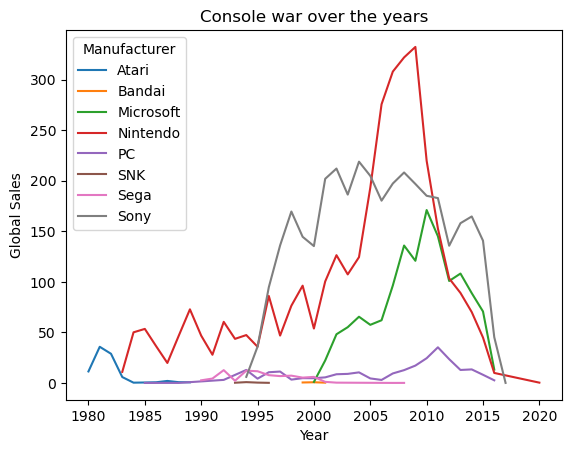

In [185]:
# The Console war --> https://en.wikipedia.org/wiki/Console_war
manufacturer_year_games = (
    sales.groupby(["Manufacturer", "Year"]).agg({"Global_Sales": "sum"}).reset_index()
)

sns.lineplot(
    data=manufacturer_year_games,
    x="Year",
    y="Global_Sales",
    hue="Manufacturer",
)

plt.ylabel("Global Sales")
plt.title("Console war over the years")

plt.show()

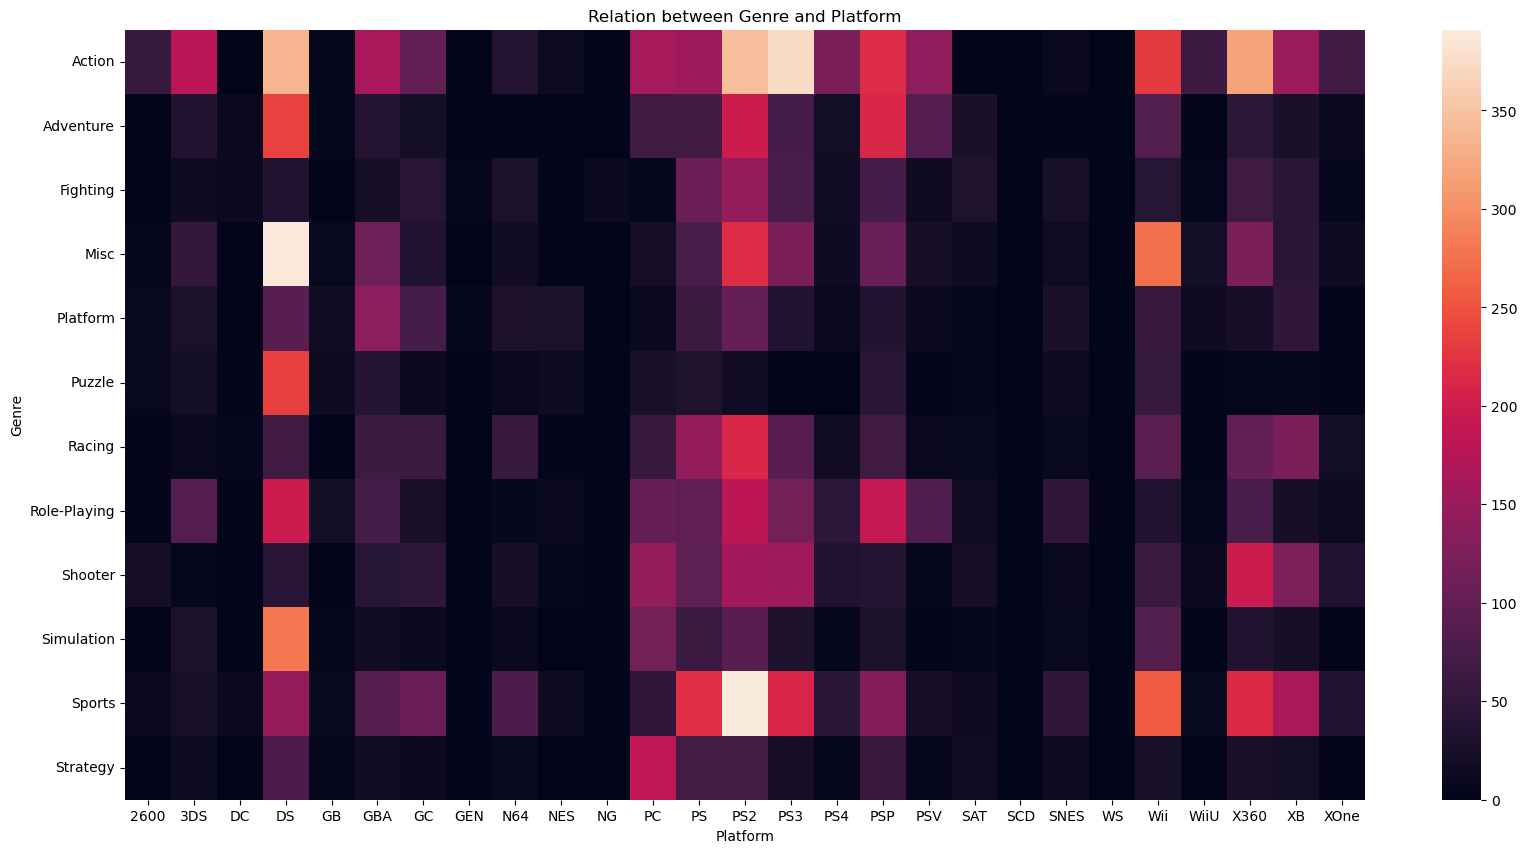

In [186]:
# Relational map between Genre and Platform

genre = sales.groupby(["Genre", "Platform"]).agg({"Name": "count"}).reset_index()

plt.figure(figsize=(20, 10))

sns.heatmap(
    data=genre.pivot(index="Genre", columns="Platform", values="Name").fillna(0),
)

plt.title("Relation between Genre and Platform")
plt.show()